# Comparing sizes of GIM2D vs NSA Sersic fits

In GIM2D table 1 (devauc + exp fit)
* Rhlr_1 = 1/2 light radius is r-band in kpc
* Re = effective radius of bulge in kpc
* Rd = effective radius of disk in kpc

### Setting up python and reading in data

In [14]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append("/Users/rfinn/Dropbox/pythonCode/")
sys.path.append("/anaconda/lib/python2.7/site-packages")
sys.path.append("/Users/rfinn/Ureka/variants/common/lib/python2.7/site-packages")
from astropy.io import fits


In [17]:
#infile='/Users/rfinn/research/LocalClusters/NSAmastertables/LCS_all_size.fits'
#s=fits.getdata(infile)
#flag=s['matchflag']
%run ~/Dropbox/pythonCode/LCSanalyzeblue.py

%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%

 prefix = 
all
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
PREFIX =  all


### Plotting 1/2 light radius from GIM2D vs NSA

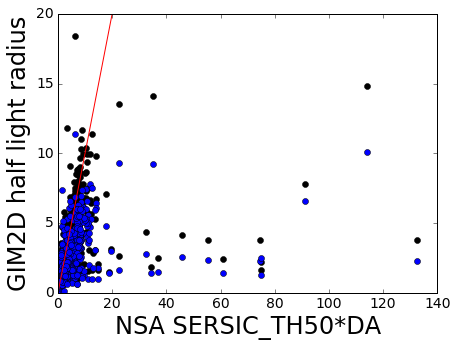

In [19]:
plt.figure()
plt.plot(s.s.SERSIC_TH50[s.gim2dflag]*s.DA[s.gim2dflag],s.s.Rhlr_1[s.gim2dflag],'ko')
#plt.plot(s.s.SERSIC_TH50[s.gim2dflag]*s.DA[s.gim2dflag],s.s.Rd[s.gim2dflag],'bo')
xl=np.linspace(0,20,2)
plt.plot(xl,xl,'r-')
plt.xlabel('NSA SERSIC_TH50*DA')
plt.ylabel('GIM2D half light radius')


**Conclusion**  two measures of radius are comparable, expect for the NSA galaxies with very large radii.  I think I cut these out of the sample.  If I used GIM2D fits, I could include them!  Right now I have:

    self.sizeflag=(self.s.SERSIC_TH50*self.DA > minsize_kpc) & (self.s.SERSIC_TH50 < 20.)
    
Using GIM2D instead will add an additional 16 galaxies.

### Comparing GIM2D bulge and disk fits to overall half-light radius

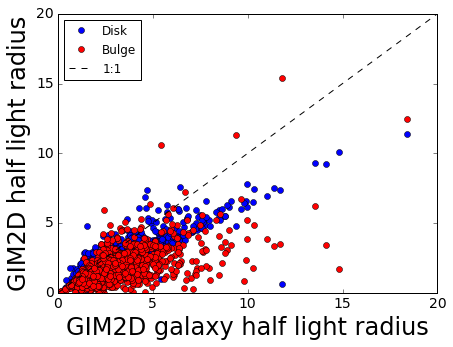

In [26]:
plt.figure()
plt.plot(s.s.Rhlr_1[s.gim2dflag],s.s.Rd[s.gim2dflag],'bo',label='Disk')
plt.plot(s.s.Rhlr_1[s.gim2dflag],s.s.Re[s.gim2dflag],'ro',label='Bulge')

xl=np.linspace(0,20,2)
plt.plot(xl,xl,'k--',label='1:1')
plt.ylabel('GIM2D half light radius')
plt.xlabel('GIM2D galaxy half light radius')
plt.legend(numpoints=1,loc='upper left')

**CONCLUSION** Both bulge and disk 1/2 light radii are less than 1/2 light radius for entire galaxy.  This surprises me.  I would think that the disk is more extended and flatter, so the disk should have a larger half-light radius.  What am I missing?

### Comparing Size Ratios (Re(24)/Re(r)) derived from GIM2D vs NSA

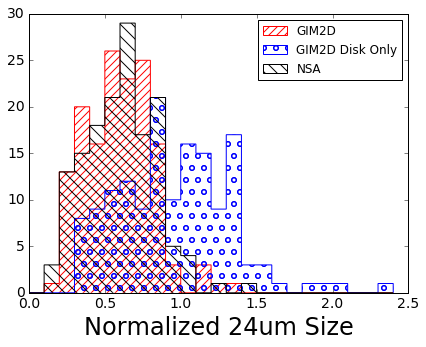

In [45]:
plt.figure()
bins=np.arange(0,2.5,.1)
plt.hist(s.SIZE_RATIO_gim2d[s.sampleflag],histtype='step',hatch='///',color='r',bins=bins,label='GIM2D')
plt.hist(s.SIZE_RATIO_DISK[s.sampleflag],histtype='step',color='b',hatch='o',bins=bins,label='GIM2D Disk Only')
plt.hist(s.s.SIZE_RATIO[s.sampleflag],histtype='step',color='k',hatch='\\\\',bins=bins,label='NSA')
plt.legend(loc='upper right')
plt.xlabel('Normalized 24um Size')

** CONCLUSION ** The GIM2D and NSA size ratios are comparable - this is good!  The size ratios are larger when using the disk scale length only, because the disk scale lengths are smaller than the scale length for the entire galaxy.  Again, I don't understand this, but I like the fact that the mean size ratio if 0.9 when we normalize by the disk scale length!

I have edited LCSanalyzeblue.py so that you can set self.size_ratio